In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.colors import ListedColormap, BoundaryNorm
from mpl_toolkits.basemap import Basemap
import seaborn as sns

In [6]:
# Read all years of TC track in pacific ocean --------------------
AllEastTrack = pd.read_csv('~/Programming/NCL/climate/0414_essay/data/AllEastPacific.csv')
AllEastLat = AllEastTrack.iloc[:, 0].to_numpy()
AllEastLon = AllEastTrack.iloc[:, 1].to_numpy()

AllEastLat = AllEastLat.astype(float)
AllEastLon = AllEastLon.astype(float)

AllWestTrack = pd.read_csv('~/Programming/NCL/climate/0414_essay/data/AllWestPacific.csv')
AllWestLat = AllWestTrack.iloc[:, 0].to_numpy()
AllWestLon = AllWestTrack.iloc[:, 1].to_numpy()

AllWestLat = AllWestLat.astype(float)
AllWestLon = AllWestLon.astype(float)
AllWestLat = AllWestLat / 10.
AllWestLon = AllWestLon / 10.

AllLat = np.concatenate((AllWestLat, AllEastLat), axis=0).tolist()
AllLon = np.concatenate((AllWestLon, AllEastLon), axis=0).tolist()


# Read EPW years of TC track in pacific ocean --------------------
EPWEastTrack = pd.read_csv('~/Programming/NCL/climate/0414_essay/data/EPWEastPacific.csv')
EPWEastLat = EPWEastTrack.iloc[:, 0].to_numpy()
EPWEastLon = EPWEastTrack.iloc[:, 1].to_numpy()

EPWEastLat = EPWEastLat.astype(float)
EPWEastLon = EPWEastLon.astype(float)

EPWWestTrack = pd.read_csv('~/Programming/NCL/climate/0414_essay/data/EPWWestPacific.csv')
EPWWestLat = EPWWestTrack.iloc[:, 0].to_numpy()
EPWWestLon = EPWWestTrack.iloc[:, 1].to_numpy()

EPWWestLat = EPWWestLat.astype(float)
EPWWestLon = EPWWestLon.astype(float)
EPWWestLat = EPWWestLat / 10.
EPWWestLon = EPWWestLon / 10.

EPWLat = np.concatenate((EPWWestLat, EPWEastLat), axis=0).tolist()
EPWLon = np.concatenate((EPWWestLon, EPWEastLon), axis=0).tolist()


# Read CPW years of TC track in pacific ocean --------------------
CPWEastTrack = pd.read_csv('~/Programming/NCL/climate/0414_essay/data/CPWEastPacific.csv')
CPWEastLat = CPWEastTrack.iloc[:, 0].to_numpy()
CPWEastLon = CPWEastTrack.iloc[:, 1].to_numpy()

CPWEastLat = CPWEastLat.astype(float)
CPWEastLon = CPWEastLon.astype(float)

CPWWestTrack = pd.read_csv('~/Programming/NCL/climate/0414_essay/data/CPWWestPacific.csv')
CPWWestLat = CPWWestTrack.iloc[:, 0].to_numpy()
CPWWestLon = CPWWestTrack.iloc[:, 1].to_numpy()

CPWWestLat = CPWWestLat.astype(float)
CPWWestLon = CPWWestLon.astype(float)
CPWWestLat = CPWWestLat / 10.
CPWWestLon = CPWWestLon / 10.

CPWLat = np.concatenate((CPWWestLat, CPWEastLat), axis=0).tolist()
CPWLon = np.concatenate((CPWWestLon, CPWEastLon), axis=0).tolist()


# Read EPC years of TC track in pacific ocean --------------------
EPCEastTrack = pd.read_csv('~/Programming/NCL/climate/0414_essay/data/EPCEastPacific.csv')
EPCEastLat = EPCEastTrack.iloc[:, 0].to_numpy()
EPCEastLon = EPCEastTrack.iloc[:, 1].to_numpy()

EPCEastLat = EPCEastLat.astype(float)
EPCEastLon = EPCEastLon.astype(float)

EPCWestTrack = pd.read_csv('~/Programming/NCL/climate/0414_essay/data/EPCWestPacific.csv')
EPCWestLat = EPCWestTrack.iloc[:, 0].to_numpy()
EPCWestLon = EPCWestTrack.iloc[:, 1].to_numpy()

EPCWestLat = EPCWestLat.astype(float)
EPCWestLon = EPCWestLon.astype(float)
EPCWestLat = EPCWestLat / 10.
EPCWestLon = EPCWestLon / 10.

EPCLat = np.concatenate((EPCWestLat, EPCEastLat), axis=0).tolist()
EPCLon = np.concatenate((EPCWestLon, EPCEastLon), axis=0).tolist()

In [7]:
# Create a Gaussian kernel density estimator object --------------------
AllKde = gaussian_kde(np.vstack([AllLon, AllLat]), bw_method=0.13)
EPWKde = gaussian_kde(np.vstack([EPWLon, EPWLat]), bw_method=0.13)
CPWKde = gaussian_kde(np.vstack([CPWLon, CPWLat]), bw_method=0.13)
EPCKde = gaussian_kde(np.vstack([EPCLon, EPCLat]), bw_method=0.13)


# Define the grid on which to evaluate the KDE --------------------
x_grid = np.linspace(100, 280, num=360)
y_grid = np.linspace(0, 45, num=180)
X, Y = np.meshgrid(x_grid, y_grid)
print(X)
print(Y)


# Evaluate the KDE on the grid --------------------
AllZ = AllKde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)
EPWZ = EPWKde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)
CPWZ = CPWKde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)
EPCZ = EPCKde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

[[100.         100.50139276 101.00278552 ... 278.99721448 279.49860724
  280.        ]
 [100.         100.50139276 101.00278552 ... 278.99721448 279.49860724
  280.        ]
 [100.         100.50139276 101.00278552 ... 278.99721448 279.49860724
  280.        ]
 ...
 [100.         100.50139276 101.00278552 ... 278.99721448 279.49860724
  280.        ]
 [100.         100.50139276 101.00278552 ... 278.99721448 279.49860724
  280.        ]
 [100.         100.50139276 101.00278552 ... 278.99721448 279.49860724
  280.        ]]
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.25139665  0.25139665  0.25139665 ...  0.25139665  0.25139665
   0.25139665]
 [ 0.5027933   0.5027933   0.5027933  ...  0.5027933   0.5027933
   0.5027933 ]
 ...
 [44.4972067  44.4972067  44.4972067  ... 44.4972067  44.4972067
  44.4972067 ]
 [44.74860335 44.74860335 44.74860335 ... 44.74860335 44.74860335
  44.74860335]
 [45.         45.         45.         ... 45.         45.
  45.        ]

<AxesSubplot:ylabel='Density'>

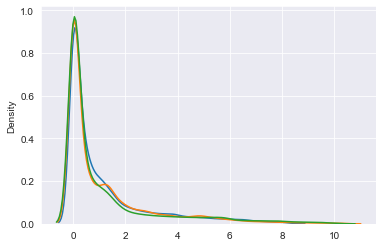

In [8]:
AllZ_ = AllZ
EPWZ_ = EPWZ
CPWZ_ = CPWZ
EPCZ_ = EPCZ

AllZ_handle = AllZ_.ravel()*10000
EPWZ_handle = EPWZ_.ravel()*10000
CPWZ_handle = CPWZ_.ravel()*10000
EPCZ_handle = EPCZ_.ravel()*10000

sns.kdeplot(data=EPWZ_handle)
sns.kdeplot(data=CPWZ_handle)
sns.kdeplot(data=EPCZ_handle)

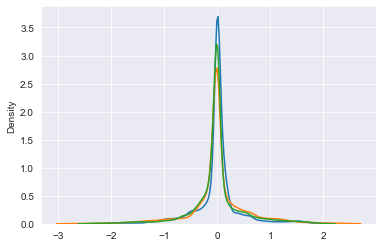

In [9]:
# *Z is the 2D array of the density plot

anomalyEPWZ = EPWZ_ - AllZ_
anomalyCPWZ = CPWZ_ - AllZ_
anomalyEPCZ = EPCZ_ - AllZ_

sns.kdeplot(data=anomalyEPWZ.ravel()*10000)
sns.kdeplot(data=anomalyCPWZ.ravel()*10000)
sns.kdeplot(data=anomalyEPCZ.ravel()*10000)


# Process the map first --------------------
pacificMap = Basemap(projection='mill',llcrnrlat=0,urcrnrlat=45,
                     llcrnrlon=100,urcrnrlon=280,resolution='c')
x, y = pacificMap(*np.meshgrid(x_grid, y_grid))


# Create a custom colormap --------------------
colors = [
    "#38366a", "#3b408b", "#2c6ab2", "#3677ba", "#2f90cc", "#58b2e3",
    "#9fd9de", (1, 1, 1, 0), "#fee578", "#f69835", "#f06d36", "#ef5537",
    "#ee4737", "#ed3838", "#bb3133"
]
color_bins = [-12, -6, -5, -4, -3, -2, -1, -0.5, 0.5, 1, 2, 3, 4, 5, 6, 12]
cmap = ListedColormap(colors)
norm = BoundaryNorm(color_bins, len(colors))

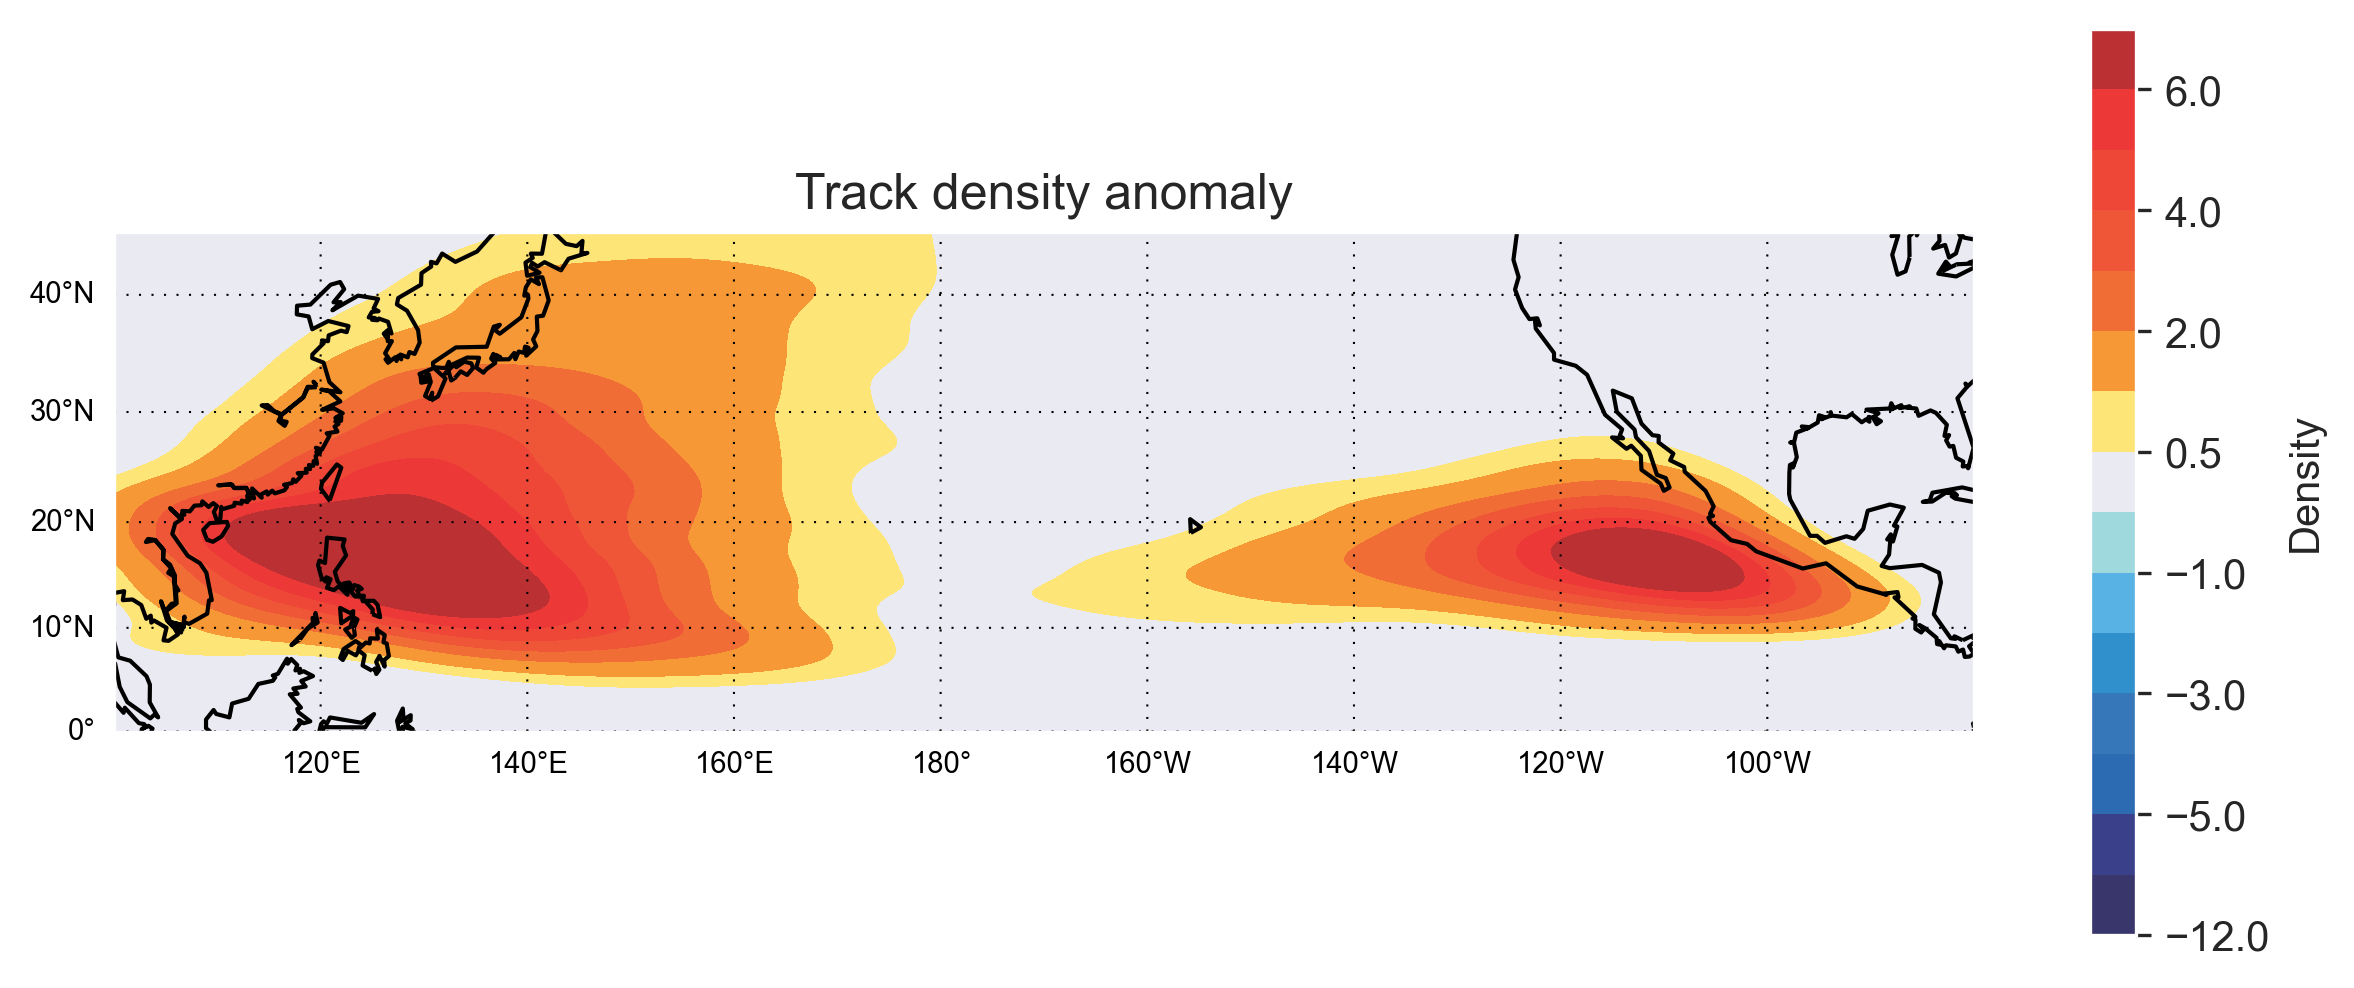

In [10]:
fig1 = plt.figure(figsize=(10, 4), dpi=300)

pacificMap.drawcoastlines()
pacificMap.drawparallels(np.arange(0 , 45, 10), labels=[1,0,0,0], dashes=[1,5], linewidth=0.5, fontsize=7)
pacificMap.drawmeridians(np.arange(120 , 280, 20), labels=[0,0,0,1], dashes=[1,5], linewidth=0.5, fontsize=7)
pacificMap.contourf(X, Y, AllZ*10000, cmap=cmap, norm=norm, levels=color_bins, latlon=True)

plt.title('Track density anomaly')
plt.colorbar(label='Density')
# Save the figure as a PNG file
plt.savefig('../image/Fig_5ALL.png', dpi=300, bbox_inches='tight')

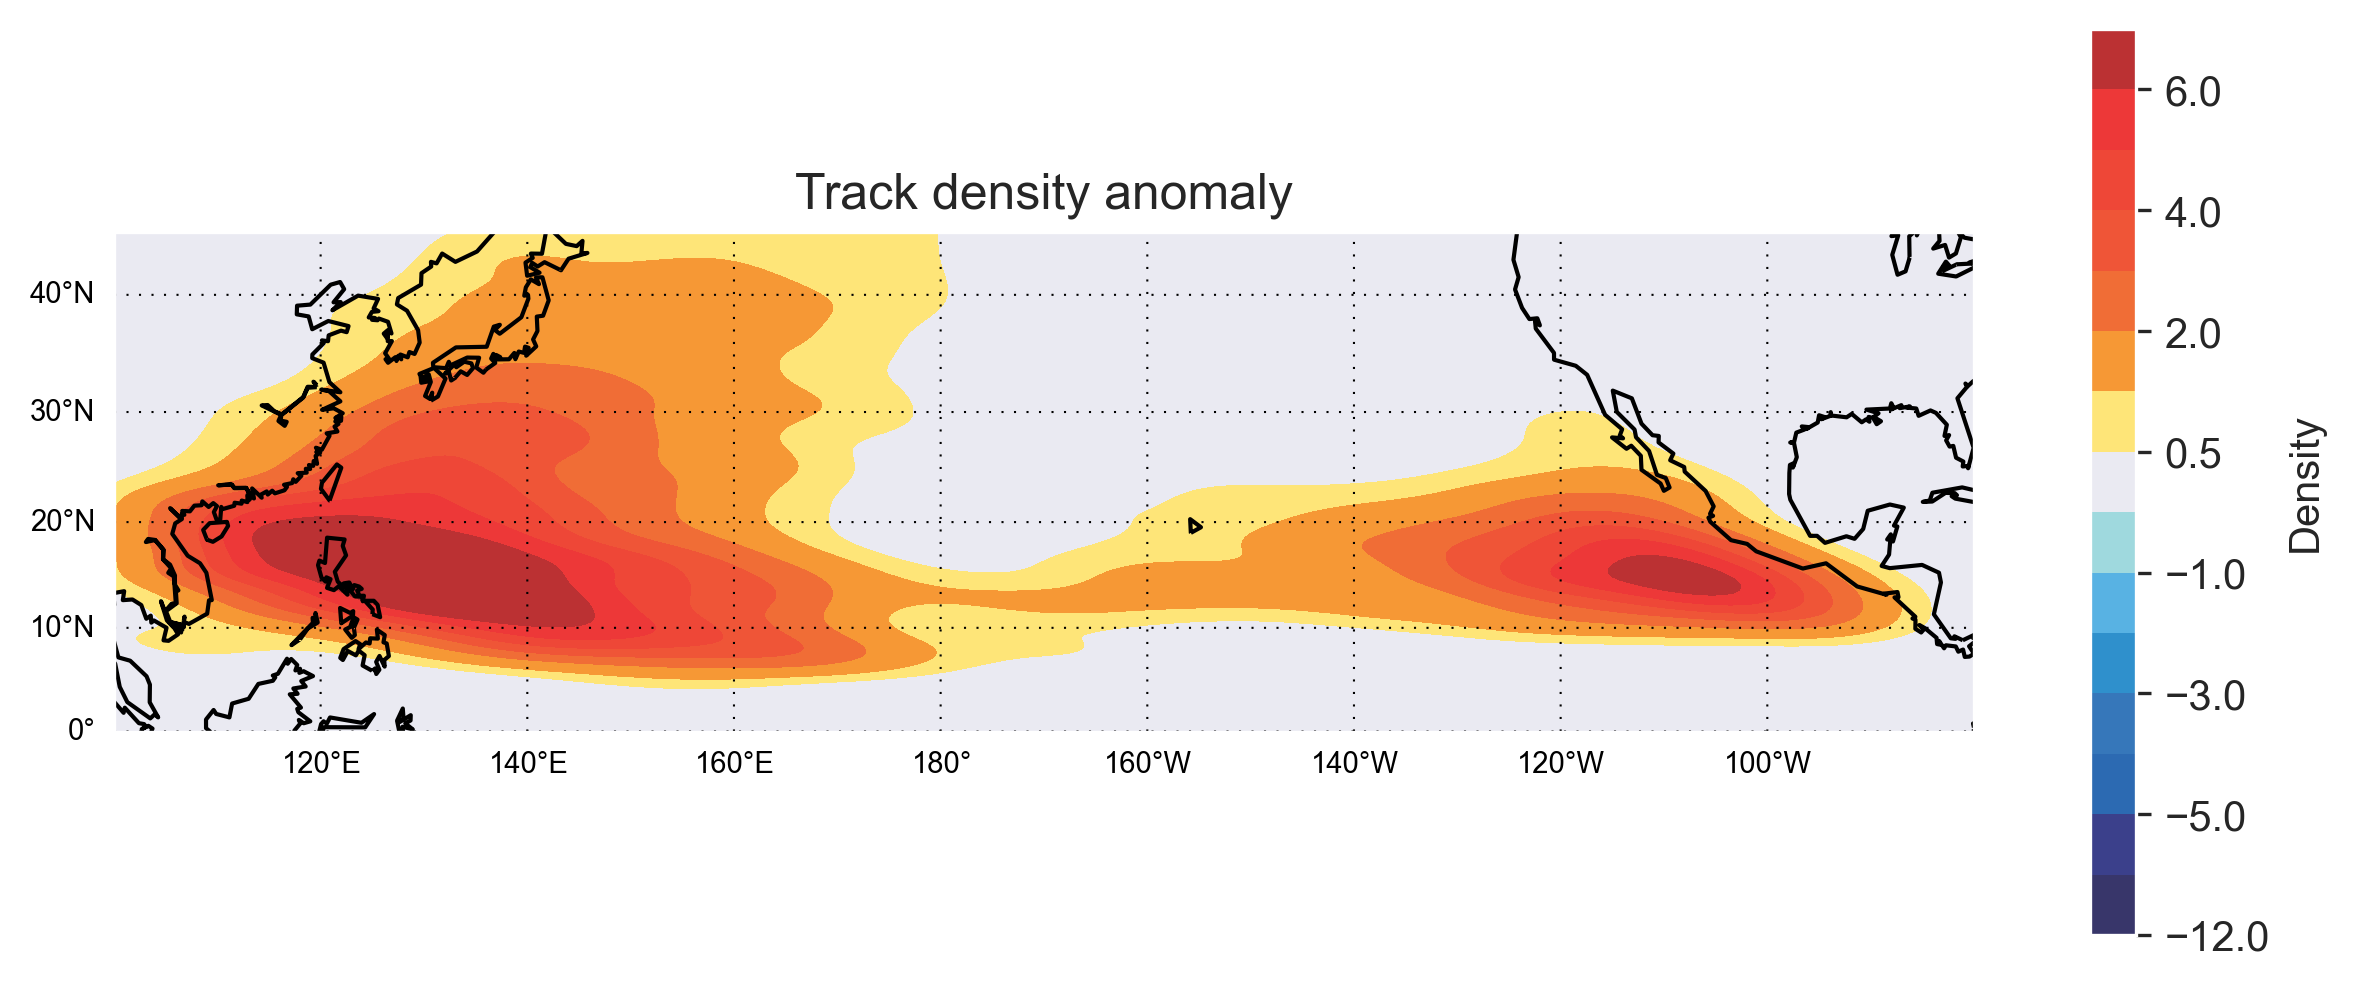

In [11]:
fig2 = plt.figure(figsize=(10, 4), dpi=300)

pacificMap.drawcoastlines()
pacificMap.drawparallels(np.arange(0 , 45, 10), labels=[1,0,0,0], dashes=[1,5], linewidth=0.5, fontsize=7)
pacificMap.drawmeridians(np.arange(120 , 280, 20), labels=[0,0,0,1], dashes=[1,5], linewidth=0.5, fontsize=7)
pacificMap.contourf(X, Y, EPWZ*10000, cmap=cmap, norm=norm, levels=color_bins, latlon=True)

plt.title('Track density anomaly')
plt.colorbar(label='Density')
# Save the figure as a PNG file
plt.savefig('../image/Fig_5EPW.png', dpi=300, bbox_inches='tight')

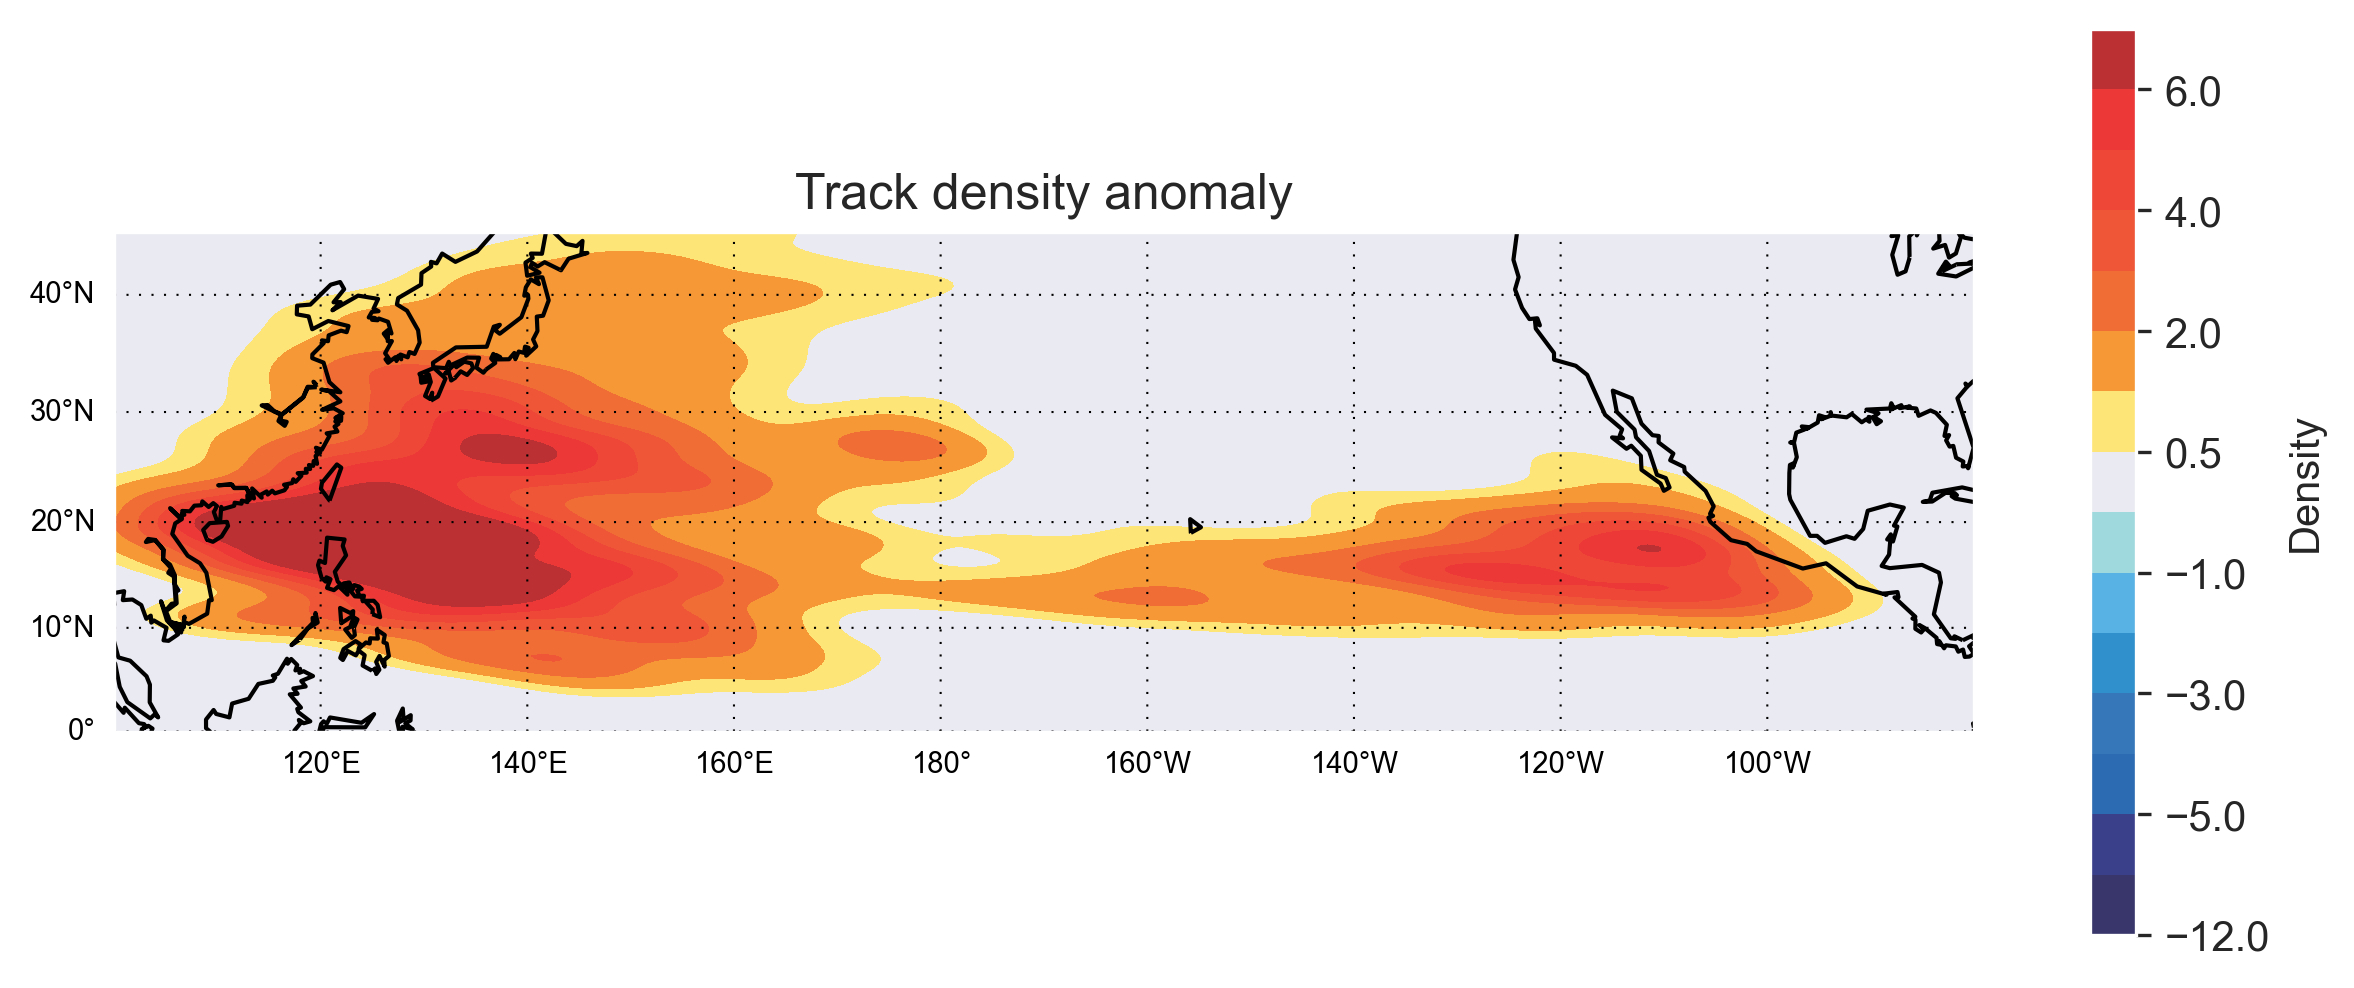

In [12]:
fig3 = plt.figure(figsize=(10, 4), dpi=300)

pacificMap.drawcoastlines()
pacificMap.drawparallels(np.arange(0 , 45, 10), labels=[1,0,0,0], dashes=[1,5], linewidth=0.5, fontsize=7)
pacificMap.drawmeridians(np.arange(120 , 280, 20), labels=[0,0,0,1], dashes=[1,5], linewidth=0.5, fontsize=7)
pacificMap.contourf(X, Y, CPWZ*10000, cmap=cmap, norm=norm, levels=color_bins, latlon=True)

plt.title('Track density anomaly')
plt.colorbar(label='Density')
# Save the figure as a PNG file
plt.savefig('../image/Fig_5CPW.png', dpi=300, bbox_inches='tight')

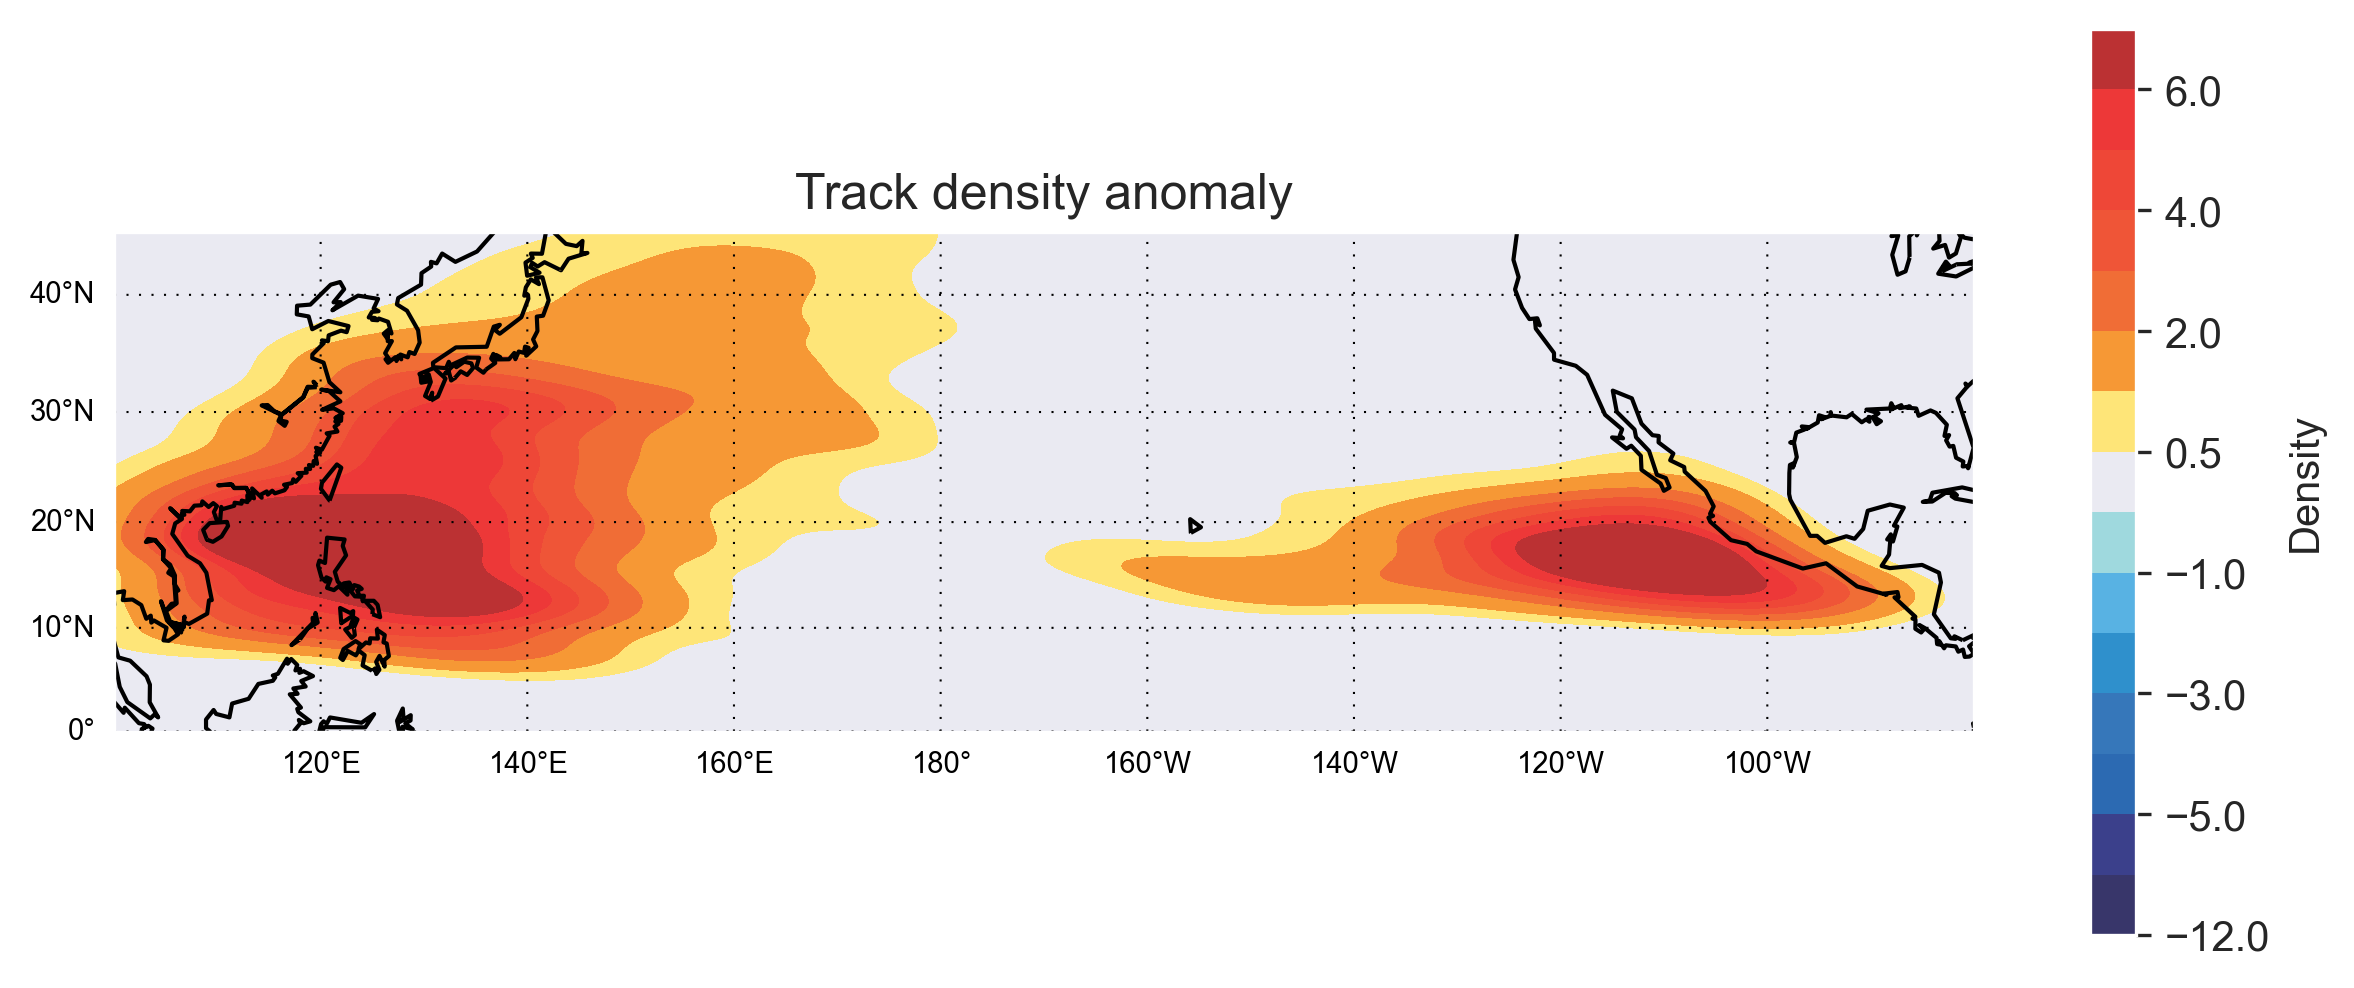

In [13]:
fig4 = plt.figure(figsize=(10, 4), dpi=300)

pacificMap.drawcoastlines()
pacificMap.drawparallels(np.arange(0 , 45, 10), labels=[1,0,0,0], dashes=[1,5], linewidth=0.5, fontsize=7)
pacificMap.drawmeridians(np.arange(120 , 280, 20), labels=[0,0,0,1], dashes=[1,5], linewidth=0.5, fontsize=7)
pacificMap.contourf(X, Y, EPCZ*10000, cmap=cmap, norm=norm, levels=color_bins, latlon=True)

plt.title('Track density anomaly')
plt.colorbar(label='Density')
# Save the figure as a PNG file
plt.savefig('../image/Fig_5EPC.png', dpi=300, bbox_inches='tight')

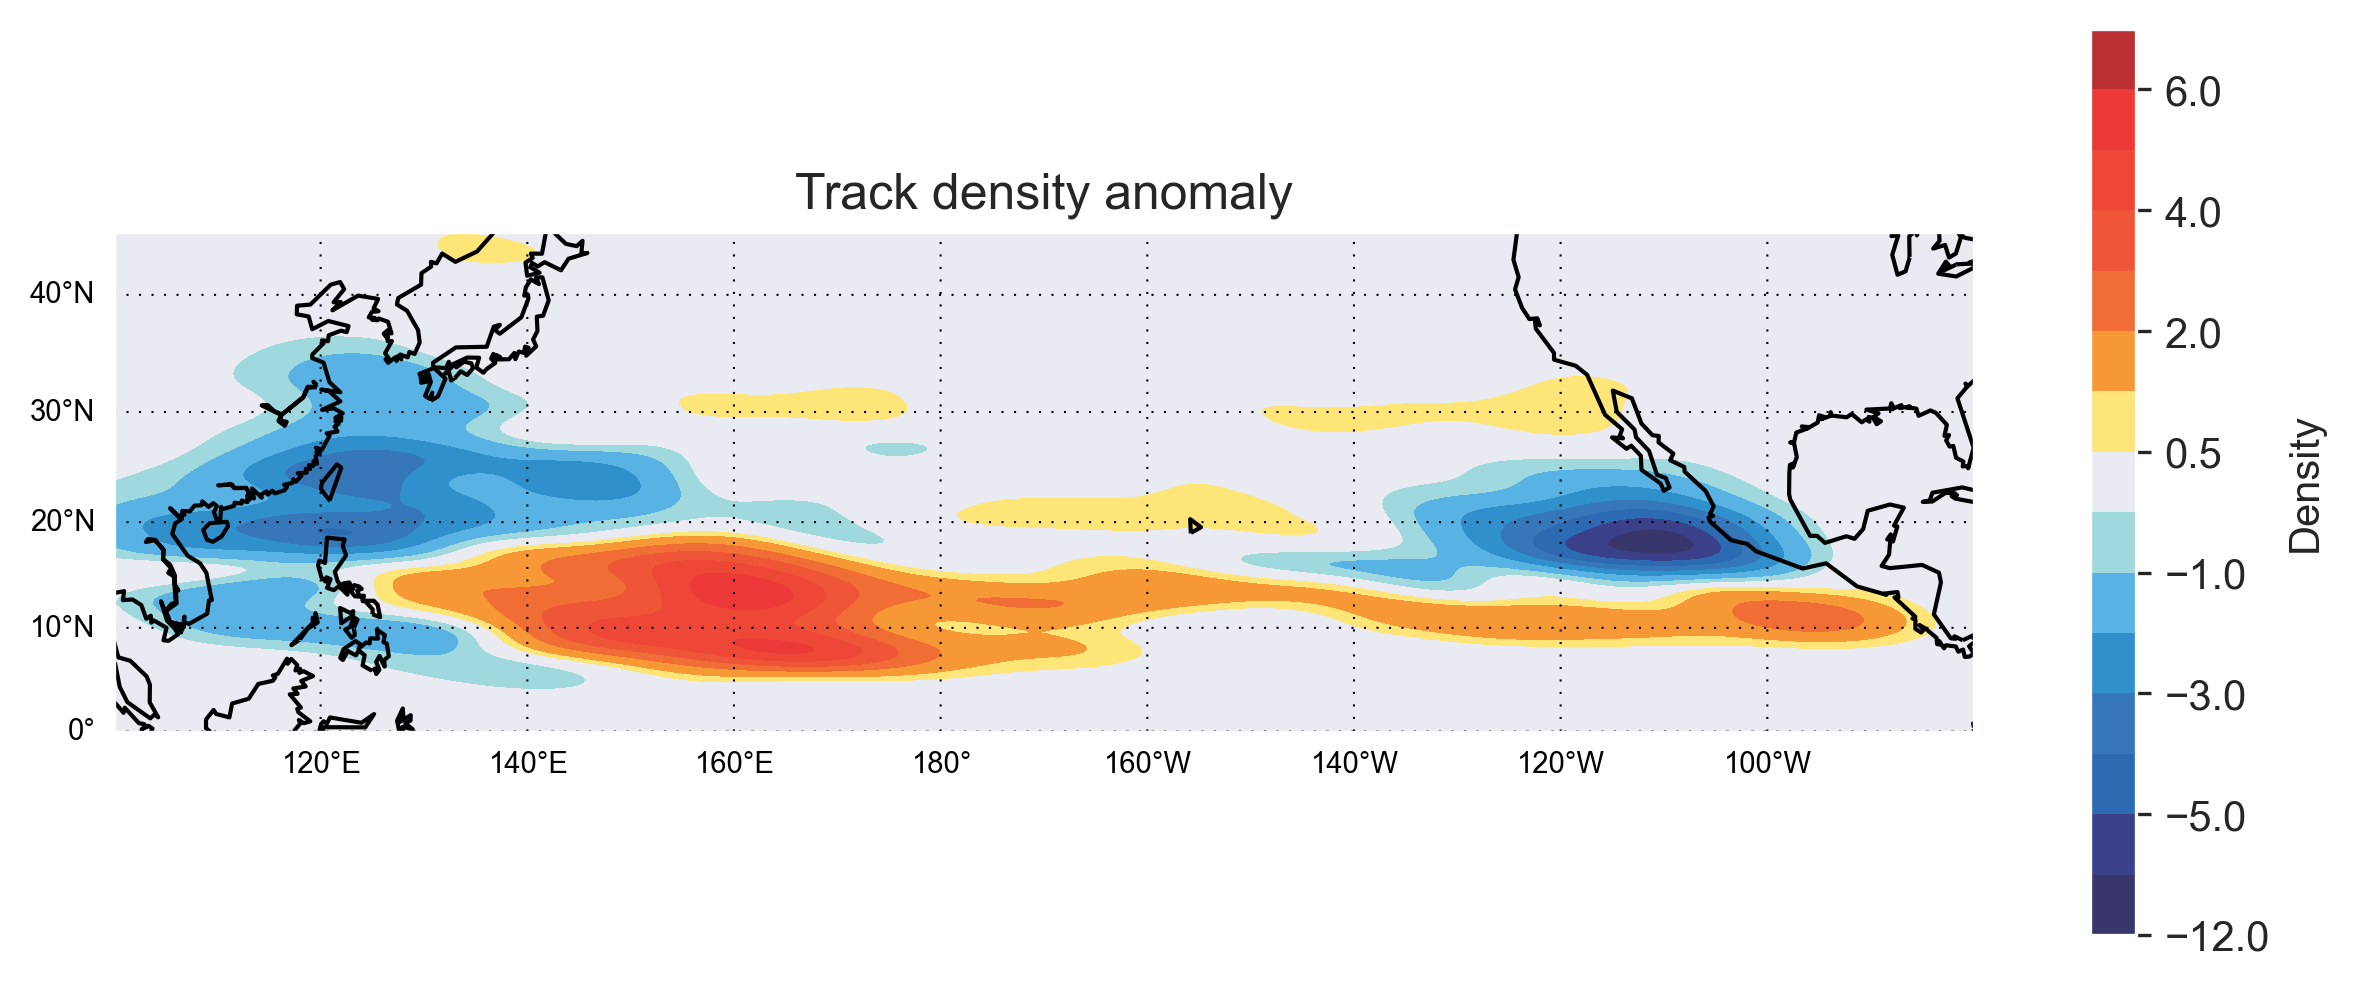

In [14]:
fig5 = plt.figure(figsize=(10, 4), dpi=300)

pacificMap.drawcoastlines()
pacificMap.drawparallels(np.arange(0 , 45, 10), labels=[1,0,0,0], dashes=[1,5], linewidth=0.5, fontsize=7)
pacificMap.drawmeridians(np.arange(120 , 280, 20), labels=[0,0,0,1], dashes=[1,5], linewidth=0.5, fontsize=7)
pacificMap.contourf(X, Y, anomalyEPWZ*30000, cmap=cmap, norm=norm, levels=color_bins, latlon=True)

plt.title('Track density anomaly')
plt.colorbar(label='Density')
# Save the figure as a PNG file
plt.savefig('../image/Fig_5a.png', dpi=300, bbox_inches='tight')

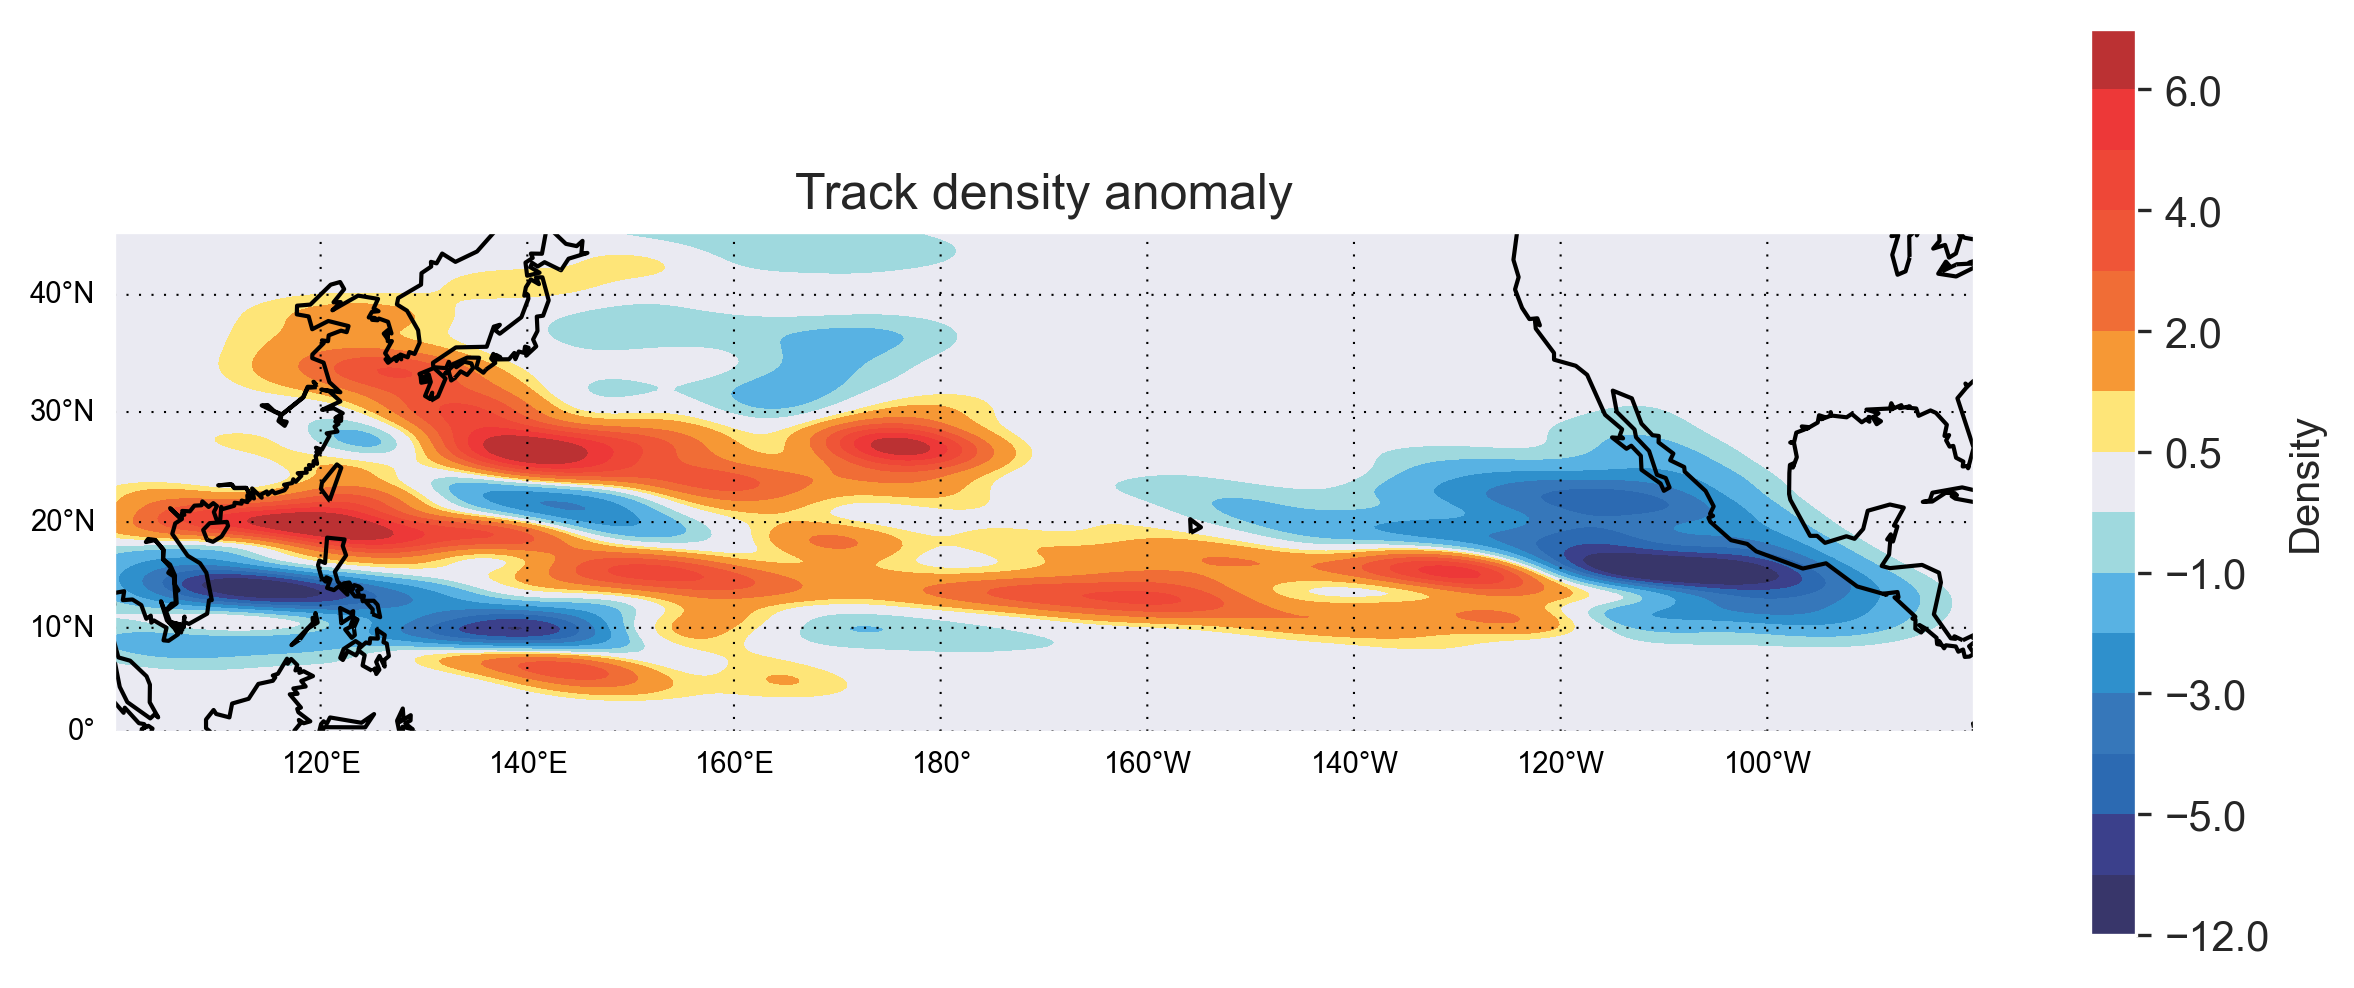

In [15]:
fig6 = plt.figure(figsize=(10, 4), dpi=300)

pacificMap.drawcoastlines()
pacificMap.drawparallels(np.arange(0 , 45, 10), labels=[1,0,0,0], dashes=[1,5], linewidth=0.5, fontsize=7)
pacificMap.drawmeridians(np.arange(120 , 280, 20), labels=[0,0,0,1], dashes=[1,5], linewidth=0.5, fontsize=7)
pacificMap.contourf(X, Y, anomalyCPWZ*30000, cmap=cmap, norm=norm, levels=color_bins, latlon=True)

plt.title('Track density anomaly')
plt.colorbar(label='Density')
# Save the figure as a PNG file
plt.savefig('../image/Fig_5b.png', dpi=300, bbox_inches='tight')

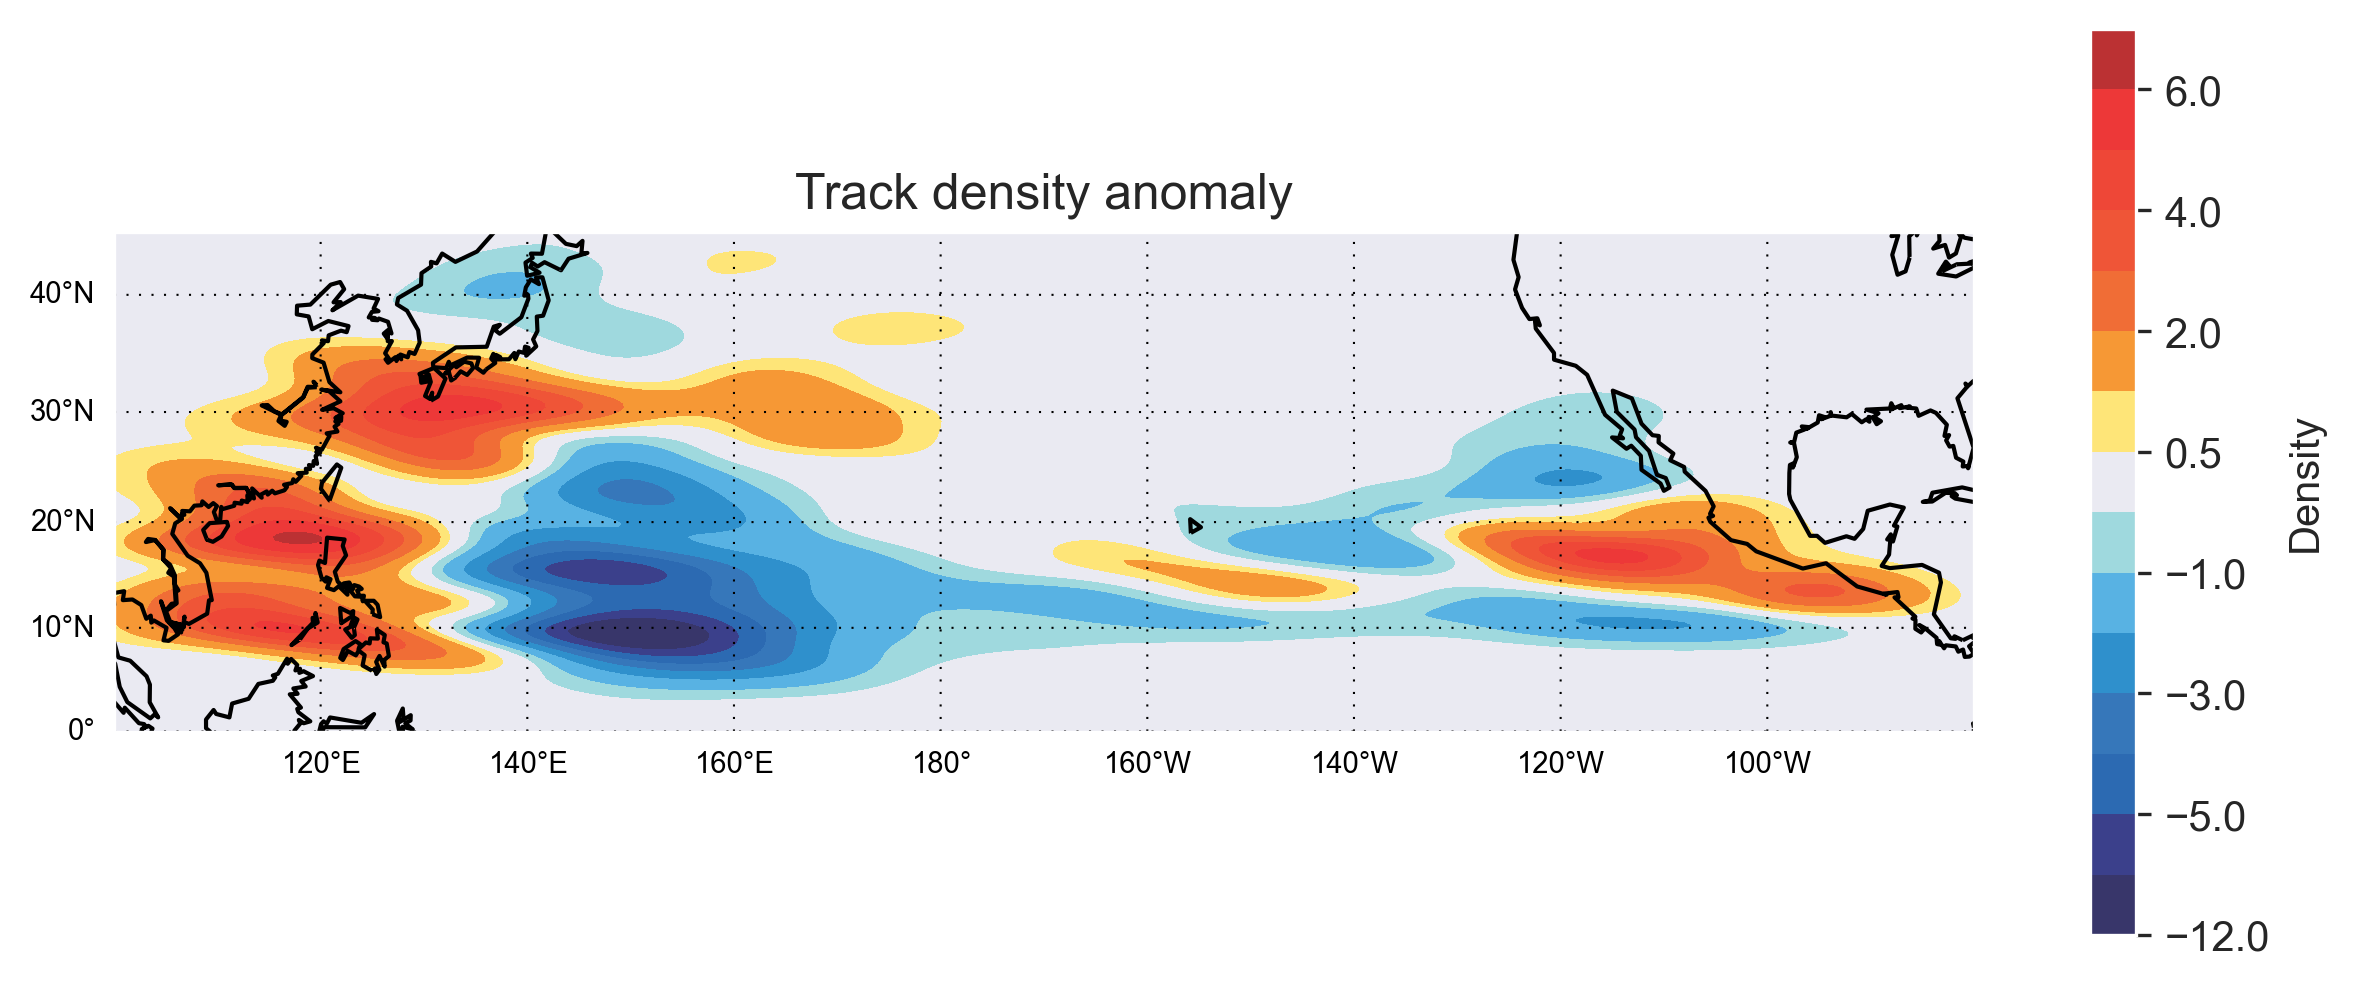

In [16]:
fig7 = plt.figure(figsize=(10, 4), dpi=300)

pacificMap.drawcoastlines()
pacificMap.drawparallels(np.arange(0 , 45, 10), labels=[1,0,0,0], dashes=[1,5], linewidth=0.5, fontsize=7)
pacificMap.drawmeridians(np.arange(120 , 280, 20), labels=[0,0,0,1], dashes=[1,5], linewidth=0.5, fontsize=7)
pacificMap.contourf(X, Y, anomalyEPCZ*30000, cmap=cmap, norm=norm, levels=color_bins, latlon=True)

plt.title('Track density anomaly')
plt.colorbar(label='Density')
# Save the figure as a PNG file
plt.savefig('../image/Fig_5c.png', dpi=300, bbox_inches='tight')